## #3.1 포트폴리오의 기대수익률과 위험

Markowitz's MPT(Modern Portfolio Theory) - <*`Portfolio Selection`*>

Pareto optimal risk-return (파레토 최적 리스크-수익) 조합

### 3.1.1 두 개의 주식으로 구성된 portfolio

Consider a portfolio consisting of two stocks $A, B$ with weights $w_A, w_B$ and with individual expected returns $r_A, r_B$, respectively.

An expected return(기대 수익률) $r_p$ of the portfolio is:
$$
    r_p = w_A r_A + w_B r_B
$$

In [1]:
# initial settings
# expected returns for each stock; bull/neutral/bear market resp.
stock_a = [0.07, 0.04, 0.01]
stock_b = [0.13, 0.04, -0.05]
prob = [1/3, 1/3, 1/3]

ex_a = 0.0
ex_b = 0.0
wgt_a = 0.5
wgt_b = 0.5

In [2]:
for s, p in zip(stock_a, prob):
    ex_a += s*p

ex_a

0.04

In [3]:
# inline for loop
ex_a = sum(s*p for s, p in zip(stock_a, prob))

ex_a

0.04

In [4]:
ex_b = sum(s*p for s, p in zip(stock_b, prob))

ex_b

0.04000000000000001

In [5]:
# expected return(기대수익률) of a portfolio
ex_p = wgt_a * ex_a + wgt_b * ex_b
ex_p

0.04000000000000001

In [6]:
print('주식 A의 기대수익률은 {:.2%}'.format(ex_a))
print('주식 B의 기대수익률은 {:.2%}'.format(ex_b))
print('포트폴리오의 기대수익률은 {:.2%}'.format(ex_p))

주식 A의 기대수익률은 4.00%
주식 B의 기대수익률은 4.00%
포트폴리오의 기대수익률은 4.00%


In [7]:
import numpy as np

prob = np.matrix([1/3, 1/3, 1/3])
stock_a = np.matrix([7, 4, 1])
stock_b = np.matrix([13, 4, -5])

ex_a = prob * stock_a.T
ex_b = prob * stock_b.T

print('주식 A의 기대수익률은 %.2f%%' % ex_a)
print('주식 B의 기대수익률은 %.2f%%' % ex_b)

주식 A의 기대수익률은 4.00%
주식 B의 기대수익률은 4.00%


now (to extend this method by using `np.matrix` in the future,) we compute the expected return of the whole portfolio consitsting of stock A & B with assigned weights:

In [8]:
weight = np.matrix([0.5, 0.5])

ex_ab = np.matrix([[ex_a.item(), ex_b.item()]])

ex_p = weight * ex_ab.T

print('포트폴리오의 기대수익률은 %.2f%%' % ex_p)

포트폴리오의 기대수익률은 4.00%


In [9]:
weight = np.matrix([0.5, 0.5])

# ax_ab = np.matrix([[np.asscalar(ex_a), np.asscalar(ex_b)]])
ex_ab = np.matrix([[ex_a.item(), ex_b.item()]])

ex_p = weight * ex_ab.T

print('포트폴리오의 기대수익률은 %.2f%%' % ex_p)

포트폴리오의 기대수익률은 4.00%


### 포트폴리오의 위험 p 105
Let's compute the associated variance, covariance and correlation:

$$
    \sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2\sigma_{12}
$$

here, $\sigma_{12}$ is Cov(, )

$$
    \sigma_p^2 = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2 \sigma_1 \sigma_2 \rho_{12}
$$

where the correlation is $\rho_{12} = \frac{\sigma_{12}}{\sigma_1 \sigma_2}$.

In [19]:
import math

stock_a = [0.07, 0.04, 0.01]
stock_b = [0.13, 0.04, -0.05]
prob = [1/3, 1/3, 1/3]

ex_a = 0.0
ex_b = 0.0

# for s, p in zip(stock_a, prob):
    # ex_a += s*p
ex_a = sum(s*p for s, p in zip(stock_a, prob))
ex_b = sum(s*p for s, p in zip(stock_b, prob))
print(ex_a, ex_b)

0.04 0.04000000000000001


In [15]:
var_a, var_b = 0.0, 0.0
wgt_a, wgt_b = 0.5, 0.5

for s, p in zip(stock_a, prob):
    var_a += p*(s-ex_a)**2
print(var_a)

0.0006000000000000001


In [17]:
var_a = sum(p*(s-ex_a)**2 for s, p in zip(stock_a, prob))
var_b = sum(p*(s-ex_b)**2 for s, p in zip(stock_b, prob))

print(var_a, var_b)
print('주식 A의 분산은 {:.2%}'.format(var_a))
print('주식 B의 분산은 {:.2%}'.format(var_b))

0.0006000000000000001 0.0054
주식 A의 분산은 0.06%
주식 B의 분산은 0.54%


In [18]:
cov = sum(p*(a-ex_a)*(b-ex_b) for a, b, p in zip(stock_a, stock_b, prob))  # definition of Covariance
var_p = wgt_a**2 * var_a + wgt_b**2 * var_b + 2 * wgt_a * wgt_b * cov
std_p = math.sqrt(var_p)
print('포트폴리오의 분산은 {:.2%}'.format(var_p))
print('포트폴리오의 표준편차는 {:.2%}'.format(std_p))

포트폴리오의 분산은 0.24%
포트폴리오의 표준편차는 4.90%


In [27]:
# print('Cov(stock_a, stock_b) is {:.2%}'.format(cov))
print(f'Cov(stock_a, stock_b) is: {cov:.2%}')

Cov(stock_a, stock_b) is 0.18%
Cov(stock_a, stock_b) is: 0.18%


In [32]:
# digression - using numpy, this calculation becomes easy
import numpy as np

variance_a = np.var(stock_a)
variance_b = np.var(stock_b)
print("자산 a의 분산:", variance_a)
print("자산 b의 분산:", variance_b)

std_dev_a = np.std(stock_a)
std_dev_b = np.std(stock_b)
print("자산 a의 표준편차:", std_dev_a)
print("자산 b의 표준편차:", std_dev_b)

cov_ab = np.cov(stock_a, stock_b)
print("두 자산 a, b의 Cov", cov_ab)

자산 a의 분산: 0.0006000000000000002
자산 b의 분산: 0.005399999999999999
자산 a의 표준편차: 0.024494897427831785
자산 b의 표준편차: 0.07348469228349534
두 자산 a, b의 Cov [[0.0009 0.0027]
 [0.0027 0.0081]]


In [33]:
cov_ab

array([[0.0009, 0.0027],
       [0.0027, 0.0081]])

### 3.1.2 $n$ 개의 주식으로 만든 포트폴리오
$n$ 개의 자산으로 구성된 포트폴리오의 수익률:
$$
    r_p = w_1r_1 + w_2r_2 + \ldots + w_nr_n
$$

$n$ 개의 자산으로 구성된 포트폴리오의 기대수익률:
$$
    E(r_p) = w_1E(r_1) + w_2E(r_2) + \ldots + w_nE(r_n)
$$

In [34]:
# 포트폴리오 기대수익률 계산
import numpy as np

numStocks = 3

# 3 represents three states: bear/neutral/bull market
returns = np.random.randn(3, numStocks)
print('1. 난수로 만드는 국면별 주식의 수익률: \n', returns)

1. 난수로 만드는 국면별 주식의 수익률: 
 [[-1.05806373 -0.25223004 -0.60325559]
 [ 0.17403838 -0.82321254  0.11095813]
 [-0.70411724 -0.0776854  -0.25076092]]


In [35]:
# prob. for each of the three states
prob = np.random.rand(3)
prob

array([0.78899272, 0.22627276, 0.51646067])

In [36]:
# to make its sum to be 1
prob = prob / prob.sum()
print('2. 경기 국면별 각 확률: \n', prob)

2. 경기 국면별 각 확률: 
 [0.51510038 0.14772403 0.33717559]


In [37]:
expectedReturns = np.matmul(prob.T, returns)
expectedReturns

array([-0.75671052, -0.27772568, -0.37889646])

In [38]:
expectedReturns = prob.T * returns
print('각 주식의 기대수익률: \n', expectedReturns)

각 주식의 기대수익률: 
 [[-0.54500903 -0.03726044 -0.20340306]
 [ 0.08964724 -0.12160827  0.03741237]
 [-0.36269106 -0.011476   -0.08455046]]


In [39]:
# weights for asset allocation
weights = np.random.rand(numStocks)
weights = weights / weights.sum()
print('4. 투자 비중*기대수익률: \n', weights)

4. 투자 비중*기대수익률: 
 [0.25242513 0.365719   0.38185587]


In [43]:
expectedReturnOfPortfolio = np.sum(weights * expectedReturns)
print('5. 포트폴리오의 기대수익률: {:.2%}'.format(expectedReturnOfPortfolio))

5. 포트폴리오의 기대수익률: -36.45%


#### Pandas를 이용해 실제 데이터로 portfolio의 기대수익률 계산



In [54]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random

tickers = ['MMM', 'ADBE','AMD', 'GOOGL', 'GOOG', 'AMZN']
len(tickers)

adjClose = pd.DataFrame()

for item in tickers:
    adjClose[item] = web.DataReader(item, data_source='yahoo', start='2018-09-15')['Adj Close']  # 에러로 인해 아래처럼 yfinance로 수정
    
adjClose.head()

6

In [58]:
import numpy as np
import pandas as pd
import yfinance as yf

tickers = ['MMM', 'ADBE', 'AMD', 'GOOGL', 'GOOG', 'AMZN']

adjClose = pd.DataFrame()

for item in tickers:
    data = yf.download(item, start='2018-09-15')['Adj Close']
    adjClose[item] = data

adjClose.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MMM,ADBE,AMD,GOOGL,GOOG,AMZN
Date,,,,,,
2018-09-17,175.449066,268.250000,32.430000,57.991501,57.802502,95.401497
2018-09-18,177.123764,270.790009,31.930000,58.355499,58.061001,97.052498
2018-09-19,178.455124,264.880005,31.209999,58.713501,58.554501,96.320999
2018-09-20,180.255417,266.339996,31.180000,59.578499,59.343498,97.214996
2018-09-21,181.143005,260.880005,31.020000,58.605999,58.304501,95.750504


In [59]:
# 일간수익률 daily returns 로 변환
dailySimpleReturns = adjClose.pct_change()
dailySimpleReturns

,MMM,ADBE,AMD,GOOGL,GOOG,AMZN
Date,,,,,,
2018-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-18,0.009545,0.009469,-0.015418,0.006277,0.004472,0.017306
2018-09-19,0.007517,-0.021825,-0.022549,0.006135,0.008500,-0.007537
2018-09-20,0.010088,0.005512,-0.000961,0.014733,0.013475,0.009281
2018-09-21,0.004924,-0.020500,-0.005131,-0.016323,-0.017508,-0.015064
...,...,...,...,...,...,...
2023-06-05,-0.044377,-0.005019,0.000594,0.010748,0.011179,0.008451
2023-06-06,0.003164,-0.002971,0.053422,0.010317,0.010108,0.010455
2023-06-07,0.027571,-0.033658,-0.051517,-0.037782,-0.038855,-0.042493


In [64]:
dailySimpleReturns.mean()

MMM     -0.000317
ADBE     0.000741
AMD      0.001776
GOOGL    0.000836
GOOG     0.000843
AMZN     0.000489
dtype: float64

In [62]:
# exp. returns 기대수익률 대신 일간수익률의 평균
meanReturns = np.matrix(dailySimpleReturns.mean())
print(meanReturns)

[[-0.00031665  0.00074136  0.00177624  0.00083598  0.00084328  0.00048902]]


In [63]:
annualReturns = dailySimpleReturns.mean() * 250
annualReturns

MMM     -0.079163
ADBE     0.185341
AMD      0.444060
GOOGL    0.208994
GOOG     0.210820
AMZN     0.122255
dtype: float64

In [66]:
numAssets = len(tickers)
numAssets

6

In [67]:
weights = np.random.random(numAssets)
weights = weights / sum(weights)
weights

array([0.02086976, 0.09186825, 0.23768212, 0.24148951, 0.23018672,
       0.17790366])

In [69]:
# 포트폴리오의 기대수익률 expected return of the portfolio - weights are given randomly
portReturnsExpected = np.sum(weights * meanReturns.T)
portReturnsExpected

0.0009666698341511801

#### $n$개 주식 포트폴리오의 위험

consider a portfolio consisting of $n$-many assets. The variance of portfolio(포트폴리오의 위험) is:

$$
    \sigma_p^2 = w_1w_1\sigma_{11} + w_1w_2\sigma_{12} + w_1w_3\sigma_{13} + \cdots + w_1w_n\sigma_{1n} \\
               + w_2w_1\sigma_{21} + w_2w_2\sigma_{22} + w_2w_3\sigma_{23} + \cdots + w_2w_n\sigma_{2n} \\
               + w_3w_1\sigma_{31} + w_3w_2\sigma_{32} + w_3w_3\sigma_{33} + \cdots + w_3w_n\sigma_{3n} \\
               + \cdots + \cdots + \cdots \\
               + w_nw_1\sigma_{n1} + w_nw_2\sigma_{n2} + w_nw_3\sigma_{n3} + \cdots + w_nw_n\sigma_{nn} \\
$$

, write in the matrix form as:

$$
    \sigma_p^2 = \begin{pmatrix} w_1 & \cdots & w_n \end{pmatrix} \times
                 \begin{pmatrix} {\sigma_1}^2 & \sigma_{1,2} & \cdots & \sigma_{1n} \\
                                 \sigma_{2,1} & {\sigma_2}^2 & \cdots & \sigma_{2,n} \\
                                 \vdots & \vdots & \ddots & \vdots \\
                                 \sigma_{n,1} & \sigma_{n,2} & \cdots & {\sigma_n}^2 \\ \end{pmatrix} \times
                 \begin{pmatrix} w_1 \\ \vdots \\ w_n \end{pmatrix}
$$

In [70]:
weights = np.matrix(weights)
weights

matrix([[0.02086976, 0.09186825, 0.23768212, 0.24148951, 0.23018672,
         0.17790366]])

In [71]:
print('dailySimpleReturns의 데이터형:', type(dailySimpleReturns))

dailySimpleReturns의 데이터형: <class 'pandas.core.frame.DataFrame'>


In [72]:
print('dailySimpleReturns.cov() 결과의 데이터형:', type(dailySimpleReturns.cov()))
# 즉 .cov() 는 DataFrame

dailySimpleReturns.cov() 결과의 데이터형: <class 'pandas.core.frame.DataFrame'>


In [73]:
# .values로 행렬로 변환
pcov = dailySimpleReturns.cov().values
pcov

array([[0.00031141, 0.00015385, 0.00020963, 0.00014951, 0.00015054,
        0.00012945],
       [0.00015385, 0.00059523, 0.00051781, 0.00035057, 0.00034917,
        0.00038108],
       [0.00020963, 0.00051781, 0.00129207, 0.00041287, 0.00040953,
        0.00048339],
       [0.00014951, 0.00035057, 0.00041287, 0.00041858, 0.00041674,
        0.0003273 ],
       [0.00015054, 0.00034917, 0.00040953, 0.00041674, 0.00041908,
        0.0003286 ],
       [0.00012945, 0.00038108, 0.00048339, 0.0003273 , 0.0003286 ,
        0.00054554]])

In [74]:
varp = weights * pcov * weights.T
print('포트폴리오 분산은', varp)

포트폴리오 분산은 [[0.00044846]]


### 3.2 최소분산 포트폴리오 p116

$$
\begin{align*}
    W_A $= \\
    W_B $= 1 - W_A
\end{align*}
$$


#### 3.4.6 최적 포트폴리오 선택

Optimal Portfolio


In [79]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib as mpl

tickers = ['AAPL', 'META', 'AMZN', 'GE', 'TSLA']

pxclose = pd.DataFrame()

for t in tickers:
    pxclose[t] = yf.download(t, start='2019-01-01', end='2019-12-31')['Adj Close']

pxclose.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,META,AMZN,GE,TSLA
Date,,,,,
2019-01-02,37.994492,135.679993,76.956497,47.503742,20.674667
2019-01-03,34.209961,131.740005,75.014000,47.562752,20.024000
2019-01-04,35.670364,137.949997,78.769501,48.565948,21.179333
2019-01-07,35.590965,138.050003,81.475502,51.575512,22.330667
2019-01-08,36.269440,142.529999,82.829002,50.513302,22.356667


In [80]:
pxclose.tail()

,AAPL,META,AMZN,GE,TSLA
Date,,,,,
2019-12-23,69.355141,206.179993,89.650002,68.765404,27.948000
2019-12-24,69.421059,205.119995,89.460503,68.950256,28.350000
2019-12-26,70.798401,207.789993,93.438499,69.196716,28.729334
2019-12-27,70.771545,208.100006,93.489998,68.888649,28.691999
2019-12-30,71.191574,204.410004,92.344498,68.272484,27.646667


In [81]:
# daily returns
ret_daily = pxclose.pct_change()
ret_daily.head()

,AAPL,META,AMZN,GE,TSLA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.029039,-0.025241,0.001242,-0.031472
2019-01-04,0.042689,0.047138,0.050064,0.021092,0.057697
2019-01-07,-0.002226,0.000725,0.034353,0.061969,0.054361
2019-01-08,0.019063,0.032452,0.016612,-0.020595,0.001164


In [82]:
# annual returns
ret_annual = ret_daily.mean() * 250
ret_annual

AAPL    0.663031
META    0.448025
AMZN    0.208211
GE      0.442948
TSLA    0.409853
dtype: float64

In [85]:
# covariances
cov_daily = ret_daily.cov()
cov_annual = cov_daily * 250

(cov_daily, cov_annual)

(          AAPL      META      AMZN        GE      TSLA
 AAPL  0.000273  0.000138  0.000141  0.000129  0.000170
 META  0.000138  0.000306  0.000156  0.000111  0.000129
 AMZN  0.000141  0.000156  0.000208  0.000123  0.000131
 GE    0.000129  0.000111  0.000123  0.000649  0.000189
 TSLA  0.000170  0.000129  0.000131  0.000189  0.000953,
           AAPL      META      AMZN        GE      TSLA
 AAPL  0.068299  0.034413  0.035312  0.032228  0.042429
 META  0.034413  0.076608  0.038892  0.027857  0.032298
 AMZN  0.035312  0.038892  0.051916  0.030699  0.032792
 GE    0.032228  0.027857  0.030699  0.162143  0.047215
 TSLA  0.042429  0.032298  0.032792  0.047215  0.238328)

Let's plot the `Efficient Frontier` from the portfolio consisting of these 5 chosen stocks:

In [87]:
# initalization for portfolio returns/volatility(variance)/weights
p_returns = []
p_volatility = []
p_weights = []

# num of assets (to diversify) in our portfolio
n_assets = len(tickers)
n_assets

5

C:\Users\unbes\AppData\Local\Temp\ipykernel_31340\3765966570.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


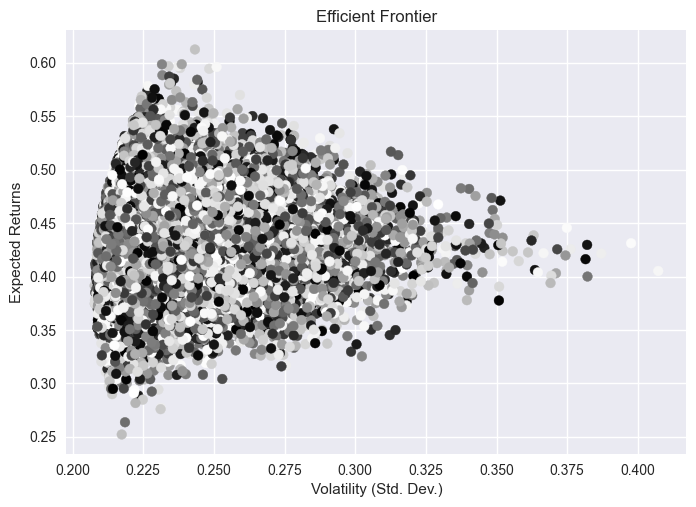

In [88]:
# num. of portfolios
n_ports = 30000

for s in range(n_ports):
    wgt = np.random.random(n_assets)
    wgt /= np.sum(wgt)

    ret = np.dot(wgt, ret_annual)  # expected returns
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))

    p_returns.append(ret)  # add values
    p_volatility.append(vol)
    p_weights.append(wgt)

p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)

# setting num of colors as n_ports
colors = np.random.randint(0, n_ports, n_ports)

plt.style.use('seaborn')

plt.scatter(p_volatility, p_returns, c=colors, marker='o')
plt.xlabel('Volatility (Std. Dev.)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

Okay, let's colorize this graph:

C:\Users\unbes\AppData\Local\Temp\ipykernel_31340\369333494.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


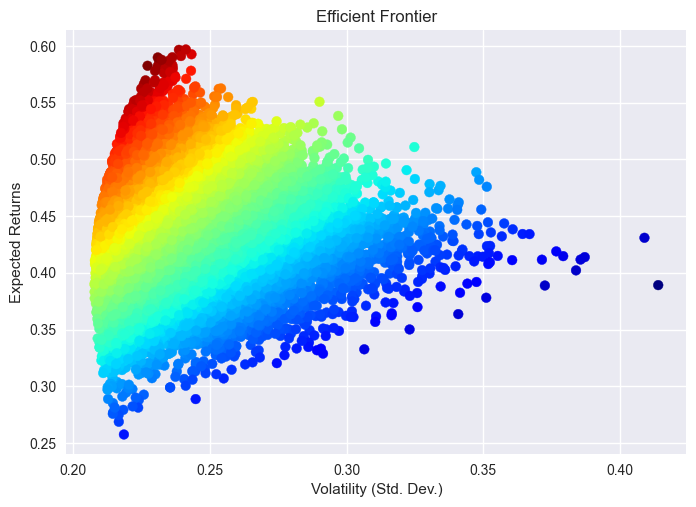

In [93]:
# initalization for portfolio returns/volatility(variance)/weights
p_returns = []
p_volatility = []
p_weights = []

# num of assets (to diversify) in our portfolio
n_assets = len(tickers)
# n_assets

n_ports = 30000

for s in range(n_ports):
    wgt = np.random.random(n_assets)
    wgt /= np.sum(wgt)
    ret = np.dot(wgt, ret_annual)
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
    p_returns.append(ret)
    p_volatility.append(vol)
    p_weights.append(wgt)

p_volatility = np.array(p_volatility)
p_returns = np.array(p_returns)

colors = p_returns/p_volatility
plt.style.use('seaborn')
plt.scatter(p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet)
plt.xlabel('Volatility (Std. Dev.)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

1. How to find min-var portfolio, given the information above?
2. If we add risk-free assets like US 10-yr treasury bond, how do we find the tangency portfolio? Let's plot the CAL, CML etc.
